<a href="https://colab.research.google.com/github/Samay-jain622/Bitcoin-Volatility/blob/main/Information_Transfer_bw_different_time_series_having_bitcoin_information_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np

In [ ]:
trends=pd.read_csv('/content/trends_normalised.csv')
trends

,Date,Bitcoin_Search
0,2015-01-01,33.000000
1,2015-01-02,38.000000
2,2015-01-03,39.000000
3,2015-01-04,33.000000
4,2015-01-05,35.000000
...,...,...
3618,2024-11-27,160.129323
3619,2024-11-28,148.483554
3620,2024-11-29,157.217881
3621,2024-11-30,133.926343


In [ ]:
# Ensure the 'date' column is in datetime format
trends['Date'] = pd.to_datetime(trends['Date'])

# Count the number of times each date repeats

# Drop duplicates and keep only one occurrence of each date
trends = trends.drop_duplicates(subset=['Date'], keep='first')

trends


,Date,Bitcoin_Search
0,2015-01-01,33.000000
1,2015-01-02,38.000000
2,2015-01-03,39.000000
3,2015-01-04,33.000000
4,2015-01-05,35.000000
...,...,...
3618,2024-11-27,160.129323
3619,2024-11-28,148.483554
3620,2024-11-29,157.217881
3621,2024-11-30,133.926343


In [ ]:
date_counts_df[date_counts_df['count']==2]

NameError: name 'date_counts_df' is not defined

In [ ]:
wiki=pd.read_csv('/content/bitcoin wiki.csv')
wiki

,Unnamed: 0,date,views
0,0,2015-07-01,13137
1,1,2015-07-02,9938
2,2,2015-07-03,8498
3,3,2015-07-04,9113
4,4,2015-07-05,8908
...,...,...,...
3467,3467,2024-12-27,11582
3468,3468,2024-12-28,10182
3469,3469,2024-12-29,9993
3470,3470,2024-12-30,9709


In [ ]:
wiki.drop(columns=['Unnamed: 0'],inplace=True)
wiki.rename(columns={'date':'Date'},inplace=True)
wiki

,Date,views
0,2015-07-01,13137
1,2015-07-02,9938
2,2015-07-03,8498
3,2015-07-04,9113
4,2015-07-05,8908
...,...,...
3467,2024-12-27,11582
3468,2024-12-28,10182
3469,2024-12-29,9993
3470,2024-12-30,9709


In [ ]:
prices=pd.read_csv('/content/bitcoin_prices.csv')
prices

,Date,Open,Close,Volume
0,2014-09-17,465.864014,457.334015,21056800
1,2014-09-18,456.859985,424.440002,34483200
2,2014-09-19,424.102997,394.795990,37919700
3,2014-09-20,394.673004,408.903992,36863600
4,2014-09-21,408.084991,398.821014,26580100
...,...,...,...,...
3761,2025-01-03,96881.726562,98107.429688,35611391163
3762,2025-01-04,98106.992188,98236.226562,22342608078
3763,2025-01-05,98233.906250,98314.960938,20525254825
3764,2025-01-06,98314.953125,102078.085938,51823432705


In [ ]:
data=[trends,wiki,prices]

In [ ]:
for d in data:
  d['Date']=pd.to_datetime(d['Date'])


In [ ]:
df=pd.merge(trends,wiki,on='Date')

In [ ]:
df=pd.merge(df,prices,on='Date')

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume
0,2015-07-01,28.957167,13137,263.345001,258.621002,27029800
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100
...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866


In [ ]:
df['Bitcoin_trading_volatility_index']=np.log(df['Volume']/df['Volume'].shift(1))
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index
0,2015-07-01,28.957167,13137,263.345001,258.621002,27029800,NaN
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153
...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524


In [ ]:
df['Bitcoin_returns']=np.log(df['Close']/df['Close'].shift(1))
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns
0,2015-07-01,28.957167,13137,263.345001,258.621002,27029800,NaN,NaN
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399
...,...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443


In [ ]:
df['Bitcoin_Search_index']=np.log(df['Bitcoin_Search']/df['Bitcoin_Search'].shift(1))
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index
0,2015-07-01,28.957167,13137,263.345001,258.621002,27029800,NaN,NaN,NaN
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000
...,...,...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343


In [ ]:
df['wiki_search_index']=np.log(df['views']/df['views'].shift(1))
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-01,28.957167,13137,263.345001,258.621002,27029800,NaN,NaN,NaN,NaN
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
...,...,...,...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for gold
gold_ticker = "GC=F"

# Download historical data for gold
gold_data = yf.download(gold_ticker, start="2010-01-01", end="2025-01-01")

# Create a new DataFrame with the desired columns
gold_filtered_df = gold_data.reset_index()[['Date', 'Close', 'Open']].copy()

# Add a ticker column
gold_filtered_df['Ticker'] = gold_ticker

# Rename columns for clarity
gold_filtered_df.rename(columns={'Date': 'date', 'Close': 'close', 'Open': 'open'}, inplace=True)

# Display the new DataFrame
print(gold_filtered_df.head())





[*********************100%***********************]  1 of 1 completed

Price        date        close         open Ticker
Ticker                    GC=F         GC=F       
0      2010-01-04  1117.699951  1117.699951   GC=F
1      2010-01-05  1118.099976  1118.099976   GC=F
2      2010-01-06  1135.900024  1135.900024   GC=F
3      2010-01-07  1133.099976  1133.099976   GC=F
4      2010-01-08  1138.199951  1138.199951   GC=F


In [ ]:
gold_filtered_df.to_csv('gold_data.csv', index=False)

In [ ]:
gold=pd.read_csv('gold_data.csv')
gold

,date,close,open,Ticker
0,1/4/2010,1117.699951,1117.699951,GC=F
1,1/5/2010,1118.099976,1118.099976,GC=F
2,1/6/2010,1135.900024,1135.900024,GC=F
3,1/7/2010,1133.099976,1133.099976,GC=F
4,1/8/2010,1138.199951,1138.199951,GC=F
...,...,...,...,...
3767,12/26/2024,2638.800049,2628.500000,GC=F
3768,12/27/2024,2617.199951,2617.699951,GC=F
3769,12/30/2024,2606.100098,2620.699951,GC=F
3770,12/31/2024,2629.199951,2608.399902,GC=F


In [ ]:
gold.dropna(inplace=True)
gold

,date,close,open,Ticker
0,1/4/2010,1117.699951,1117.699951,GC=F
1,1/5/2010,1118.099976,1118.099976,GC=F
2,1/6/2010,1135.900024,1135.900024,GC=F
3,1/7/2010,1133.099976,1133.099976,GC=F
4,1/8/2010,1138.199951,1138.199951,GC=F
...,...,...,...,...
3767,12/26/2024,2638.800049,2628.500000,GC=F
3768,12/27/2024,2617.199951,2617.699951,GC=F
3769,12/30/2024,2606.100098,2620.699951,GC=F
3770,12/31/2024,2629.199951,2608.399902,GC=F


In [ ]:
import numpy as np

In [ ]:
gold['price_returns_gold']=np.log(gold['close']/gold['close'].shift(1))
gold

,date,close,open,Ticker,price_returns_gold
0,1/4/2010,1117.699951,1117.699951,GC=F,NaN
1,1/5/2010,1118.099976,1118.099976,GC=F,0.000358
2,1/6/2010,1135.900024,1135.900024,GC=F,0.015795
3,1/7/2010,1133.099976,1133.099976,GC=F,-0.002468
4,1/8/2010,1138.199951,1138.199951,GC=F,0.004491
...,...,...,...,...,...
3767,12/26/2024,2638.800049,2628.500000,GC=F,0.007150
3768,12/27/2024,2617.199951,2617.699951,GC=F,-0.008219
3769,12/30/2024,2606.100098,2620.699951,GC=F,-0.004250
3770,12/31/2024,2629.199951,2608.399902,GC=F,0.008825


In [ ]:
gold.rename(columns={'date':'Date'},inplace=True)

gold=gold[['Date','price_returns_gold']]
gold

,Date,price_returns_gold
0,1/4/2010,NaN
1,1/5/2010,0.000358
2,1/6/2010,0.015795
3,1/7/2010,-0.002468
4,1/8/2010,0.004491
...,...,...
3767,12/26/2024,0.007150
3768,12/27/2024,-0.008219
3769,12/30/2024,-0.004250
3770,12/31/2024,0.008825


In [ ]:
gold['Date']=pd.to_datetime(gold['Date'])

<ipython-input-23-5192703ea4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['Date']=pd.to_datetime(gold['Date'])


In [ ]:
gold

,Date,price_returns_gold
0,2010-01-04,NaN
1,2010-01-05,0.000358
2,2010-01-06,0.015795
3,2010-01-07,-0.002468
4,2010-01-08,0.004491
...,...,...
3767,2024-12-26,0.007150
3768,2024-12-27,-0.008219
3769,2024-12-30,-0.004250
3770,2024-12-31,0.008825


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
5,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
df.to_csv('timeseries_data_bitcoin.csv', index=False)

Overall Analysis

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
1,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
2,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
3,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
4,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
5,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3437,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3438,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3439,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3440,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv('timeseries_data_bitcoin.csv')

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df=pd.merge(df,gold,on='Date')
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067,-0.005146
1,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226,0.008476
2,2015-07-07,33.022477,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.059734,0.085735,-0.017633
3,2015-07-08,66.544953,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.700689,-0.008640,0.009414
4,2015-07-09,68.577608,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.030088,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...
2362,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
2363,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
2364,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
2365,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:
df.to_csv('timeseries_data_bitcoin_gold.csv')

GRANGER CASUALITY

In [ ]:
df_without_gold=pd.read_csv('timeseries_data_bitcoin.csv')

In [ ]:
df_without_gold

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
rf=pd.read_csv('/content/risk and greed data.csv')
rf

,Date,score
0,01-07-2025,78
1,01-06-2025,76
2,01-05-2025,72
3,01-04-2025,73
4,01-03-2025,74
...,...,...
2524,02-05-2018,11
2525,02-04-2018,24
2526,02-03-2018,40
2527,02-02-2018,15


In [ ]:
rf['Date']=pd.to_datetime(rf['Date'])

In [ ]:
rf=rf.sort_values(by='Date')
rf

,Date,score
2528,2018-02-01,30
2527,2018-02-02,15
2526,2018-02-03,40
2525,2018-02-04,24
2524,2018-02-05,11
...,...,...
4,2025-01-03,74
3,2025-01-04,73
2,2025-01-05,72
1,2025-01-06,76


In [ ]:
data=df[['Bitcoin_returns','Bitcoin_trading_volatility_index']]

In [ ]:
df.columns

Index(['Date', 'Bitcoin_Search', 'views', 'Open', 'Close', 'Volume',
       'Bitcoin_trading_volatility_index', 'Bitcoin_returns',
       'Bitcoin_Search_index', 'wiki_search_index', 'close', 'open', 'Ticker'],
      dtype='object')

In [ ]:

x = df_without_gold['wiki_search_index']  # Predictor series
y = df_without_gold['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    if p_value < 0.05:
        print("Series is stationary.")
    else:
        print("Series is not stationary.")
    return p_value

# Apply differencing if series is non-stationary
def make_stationary(series):
    return series.diff().dropna()

# Example: Check and transform
p_value_x = check_stationarity(data['x'])
p_value_y = check_stationarity(data['y'])

if p_value_x >= 0.05:
    data['x'] = make_stationary(data['x'])

if p_value_y >= 0.05:
    data['y'] = make_stationary(data['y'])

Series is stationary.
Series is stationary.


In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,2015-07-02,31.000000,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.066691,-0.279067,-0.005146
1,2015-07-06,35.000000,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.028988,0.160226,0.008476
2,2015-07-07,33.000000,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.058841,0.085735,-0.017633
3,2015-07-08,67.000000,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.708185,-0.008640,0.009414
4,2015-07-09,69.000000,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.029414,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...
2362,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
2363,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
2364,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
2365,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:
import plotly.graph_objects as go

In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='wiki_search_index -> Bitcoin_Search_index',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_Search_index -> wiki_search_index',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()



Performing Granger Causality Test for Bitcoin_returns and Bitcoin_trading_volatility_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and Bitcoin_Search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and wiki_search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df_withgold=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')

In [ ]:
df_withgold.columns

Index(['Unnamed: 0', 'Date', 'Bitcoin_Search', 'views', 'Open', 'Close',
       'Volume', 'Bitcoin_trading_volatility_index', 'Bitcoin_returns',
       'Bitcoin_Search_index', 'wiki_search_index', 'price_returns_gold'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['price_returns_gold']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for Bitcoin_returns and price_returns_gold...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



 *COVID* 20

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')]

# Check the first few rows of the new dataframe
print(new_df.head())


           Date  Bitcoin_Search  views         Open        Close       Volume  \
1704 2020-03-01       54.267377   6902  8599.758789  8562.454102  35349164300   
1705 2020-03-02       58.683206   6572  8563.264648  8869.669922  42857674409   
1706 2020-03-03       58.683206   7543  8865.387695  8787.786133  42386715821   
1707 2020-03-04      140.926697   7554  8788.541992  8755.246094  34746706368   
1708 2020-03-05      136.510868   7666  8760.285156  9078.762695  39698054597   

      Bitcoin_trading_volatility_index  Bitcoin_returns  Bitcoin_Search_index  \
1704                         -0.012461        -0.004318              0.098891   
1705                          0.192610         0.035251              0.078230   
1706                         -0.011050        -0.009275              0.000000   
1707                         -0.198750        -0.003710              0.876086   
1708                          0.133217         0.036285             -0.031836   

      wiki_search_index  


In [ ]:
df=new_df.copy()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column} in covid 1 2020",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for Bitcoin_returns and Bitcoin_trading_volatility_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Performing Granger Causality Test for Bitcoin_returns and Bitcoin_Search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and wiki_search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})

In [ ]:
data

,x,y
1704,0.255089,0.098891
1705,-0.048993,0.078230
1706,0.137802,0.000000
1707,0.001457,0.876086
1708,0.014718,-0.031836
...,...,...
1821,0.035322,0.048790
1822,-0.105159,-0.048790
1823,0.058300,0.072321
1824,0.002076,-0.072321


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    if p_value < 0.05:
        print("Series is stationary.")
    else:
        print("Series is not stationary.")
    return p_value

# Apply differencing if series is non-stationary
def make_stationary(series):
    return series.diff().dropna()

# Example: Check and transform
p_value_x = check_stationarity(data['x'])
p_value_y = check_stationarity(data['y'])

if p_value_x >= 0.05:
    data['x'] = make_stationary(data['x'])

if p_value_y >= 0.05:
    data['y'] = make_stationary(data['y'])

Series is stationary.
Series is stationary.


In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')]

# Check the first few rows of the new dataframe
print(new_df.head())

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='wiki_search_index -> Bitcoin_Search_index',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_Search_index -> wiki_search_index',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

           Date  Bitcoin_Search  views         Open        Close       Volume  \
1704 2020-03-01       54.267377   6902  8599.758789  8562.454102  35349164300   
1705 2020-03-02       58.683206   6572  8563.264648  8869.669922  42857674409   
1706 2020-03-03       58.683206   7543  8865.387695  8787.786133  42386715821   
1707 2020-03-04      140.926697   7554  8788.541992  8755.246094  34746706368   
1708 2020-03-05      136.510868   7666  8760.285156  9078.762695  39698054597   

      Bitcoin_trading_volatility_index  Bitcoin_returns  Bitcoin_Search_index  \
1704                         -0.012461        -0.004318              0.098891   
1705                          0.192610         0.035251              0.078230   
1706                         -0.011050        -0.009275              0.000000   
1707                         -0.198750        -0.003710              0.876086   
1708                          0.133217         0.036285             -0.031836   

      wiki_search_index  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')

In [ ]:
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067,-0.005146
1,1,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226,0.008476
2,2,2015-07-07,33.022477,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.059734,0.085735,-0.017633
3,3,2015-07-08,66.544953,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.700689,-0.008640,0.009414
4,4,2015-07-09,68.577608,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.030088,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2362,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
2363,2363,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
2364,2364,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
2365,2365,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:

x = df['Bitcoin_returns']  # Predictor series
y = df['price_returns_gold']  # Target series

df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')]

# Check the first few rows of the new dataframe
print(new_df.head())

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='Bitcoin_returns -> price_returns_gold',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='price_returns_gold -> Bitcoin_returns',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

      Unnamed: 0       Date  Bitcoin_Search  views         Open        Close  \
1170        1170 2020-03-02       58.683206   6572  8563.264648  8869.669922   
1171        1171 2020-03-03       58.683206   7543  8865.387695  8787.786133   
1172        1172 2020-03-04      140.926697   7554  8788.541992  8755.246094   
1173        1173 2020-03-05      136.510868   7666  8760.285156  9078.762695   
1174        1174 2020-03-06       98.018249   6754  9078.308594  9122.545898   

           Volume  Bitcoin_trading_volatility_index  Bitcoin_returns  \
1170  42857674409                          0.192610         0.035251   
1171  42386715821                         -0.011050        -0.009275   
1172  34746706368                         -0.198750        -0.003710   
1173  39698054597                          0.133217         0.036285   
1174  40826885651                          0.028039         0.004811   

      Bitcoin_Search_index  wiki_search_index  price_returns_gold  
1170              

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Recovery Period after Covid # Filter the DataFrame

recovery period after covid 20 july to oct 2020


In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,2015-07-02,31.000000,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.066691,-0.279067,-0.005146
1,2015-07-06,35.000000,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.028988,0.160226,0.008476
2,2015-07-07,33.000000,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.058841,0.085735,-0.017633
3,2015-07-08,67.000000,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.708185,-0.008640,0.009414
4,2015-07-09,69.000000,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.029414,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...
3363,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
3364,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
3365,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
3366,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
 # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between Junefil
start_date = '2020-07-01'
end_date = '2020-10-31'

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
# Check the first few rows of the new dataframe
filtered_df
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Extract the month and create a new column
filtered_df['month'] = filtered_df['Date'].dt.month



<ipython-input-47-aef4d5373988>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-aef4d5373988>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df=filtered_df.copy()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column} in covid 1 2020",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for Bitcoin_returns and Bitcoin_trading_volatility_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and Bitcoin_Search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and wiki_search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
1914,1914,2020-07-01,67.393938,6932,9145.985352,9228.325195,15971550355,0.014871,0.009837,-0.024693,0.095440,-0.011104
1915,1915,2020-07-02,70.763634,5969,9231.139648,9123.410156,16338916796,0.022741,-0.011434,0.048790,-0.149569,0.006072
1916,1916,2020-07-06,53.915150,5978,9072.849609,9375.474609,17889263252,0.326709,0.032690,-0.247836,0.121890,0.002519
1917,1917,2020-07-07,33.696969,6579,9349.161133,9252.277344,13839652595,-0.256663,-0.013227,-0.470004,0.095797,0.008740
1918,1918,2020-07-08,70.763634,6785,9253.020508,9428.333008,19702359883,0.353201,0.018850,0.741937,0.030832,0.006244
...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2059,2020-12-24,130.363436,10785,23240.203125,23735.949219,41080759713,-0.219148,0.021058,-0.062520,-0.202515,0.002770
2060,2060,2020-12-28,189.237245,20215,26280.822266,27084.808594,49056742893,-0.303922,0.030458,-0.270875,-0.012535,-0.001437
2061,2061,2020-12-29,155.595068,19226,27081.810547,27362.437500,45265946774,-0.080423,0.010198,-0.195745,-0.050161,0.001331
2062,2062,2020-12-30,189.237245,20765,27360.089844,28840.953125,51287442704,0.124891,0.052625,0.195745,0.077005,0.005994


In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='wiki_search_index -> Bitcoin_Search_index',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_Search_index -> wiki_search_index',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067,-0.005146
1,1,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226,0.008476
2,2,2015-07-07,33.022477,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.059734,0.085735,-0.017633
3,3,2015-07-08,66.544953,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.700689,-0.008640,0.009414
4,4,2015-07-09,68.577608,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.030088,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2362,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
2363,2363,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
2364,2364,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
2365,2365,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:

x = df['price_returns_gold']  # Predictor series
y = df['Bitcoin_returns']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='price_returns_gold -> Bitcoin_returns',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_returns -> price_returns_gold',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



January to March 2021: Optimism Amid Vaccination Rollouts
start_date = '2021-01-01'
end_date = '2021-03-31'

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

start_date = '2021-01-01'
end_date = '2021-03-31'
# Create a new DataFrame with rows between March 2021 and May 2021
new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Check the first few rows of the new dataframe
print(new_df.head())

           Date  Bitcoin_Search  views          Open         Close  \
2010 2021-01-01      185.031973  14769  28994.009766  29374.152344   
2011 2021-01-02      252.316327  31342  29376.455078  32127.267578   
2012 2021-01-03      378.474491  45570  32129.408203  32782.023438   
2013 2021-01-04      328.011225  35715  32810.949219  31971.914062   
2014 2021-01-05      243.905783  31211  31977.041016  33992.429688   

           Volume  Bitcoin_trading_volatility_index  Bitcoin_returns  \
2010  40730301359                         -0.137948         0.012760   
2011  67865420765                          0.510554         0.089590   
2012  78665235202                          0.147675         0.020175   
2013  81163475344                          0.031264        -0.025022   
2014  67547324782                         -0.183637         0.061280   

      Bitcoin_Search_index  wiki_search_index  
2010              0.046520          -0.157656  
2011              0.310155           0.752429  
20

In [ ]:
df=new_df.copy()

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
2010,2021-01-01,185.031973,14769,28994.009766,29374.152344,40730301359,-0.137948,0.012760,0.046520,-0.157656
2011,2021-01-02,252.316327,31342,29376.455078,32127.267578,67865420765,0.510554,0.089590,0.310155,0.752429
2012,2021-01-03,378.474491,45570,32129.408203,32782.023438,78665235202,0.147675,0.020175,0.405465,0.374291
2013,2021-01-04,328.011225,35715,32810.949219,31971.914062,81163475344,0.031264,-0.025022,-0.143101,-0.243679
2014,2021-01-05,243.905783,31211,31977.041016,33992.429688,67547324782,-0.183637,0.061280,-0.296266,-0.134800
...,...,...,...,...,...,...,...,...,...,...
2095,2021-03-27,182.298546,19446,55137.566406,55973.511719,47266542233,-0.181128,0.015052,0.174738,0.125235
2096,2021-03-28,153.071905,22469,55974.941406,55950.746094,47686580918,0.008847,-0.000407,-0.174738,0.144495
2097,2021-03-29,204.586489,22410,55947.898438,57750.199219,57625587027,0.189317,0.031655,0.290083,-0.002629
2098,2021-03-30,173.257211,20677,57750.132812,58917.691406,54414116432,-0.057343,0.020015,-0.166214,-0.080485


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column} in covid 1 2020",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for Bitcoin_returns and Bitcoin_trading_volatility_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and Bitcoin_Search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and wiki_search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='wiki_search_index -> Bitcoin_Search_index',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_Search_index -> wiki_search_index',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')
start_date = '2021-01-01'
end_date = '2021-03-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [ ]:
df=filtered_df.copy()
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
1383,1383,2021-01-04,328.011225,35715,32810.949219,31971.914062,81163475344,0.031264,-0.025022,-0.143101,-0.243679,0.026892
1384,1384,2021-01-05,243.905783,31211,31977.041016,33992.429688,67547324782,-0.183637,0.061280,-0.296266,-0.134800,0.004105
1385,1385,2021-01-06,252.316327,31277,34013.613281,36824.363281,75289433811,0.108511,0.080022,0.033902,0.002112,-0.023734
1386,1386,2021-01-07,323.805953,38824,36833.875000,39371.042969,84762141031,0.118509,0.066871,0.249461,0.216156,0.002828
1387,1387,2021-01-08,340.627042,41323,39381.765625,40797.609375,88107519480,0.038709,0.035593,0.050644,0.062381,-0.041753
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1439,2021-03-25,193.442517,20848,52726.746094,51704.160156,67999812841,-0.037061,-0.020485,0.047867,-0.130577,-0.004627
1440,1440,2021-03-26,153.071905,17157,51683.011719,55137.312500,56652197978,-0.182574,0.064288,-0.234073,-0.194852,0.004223
1441,1441,2021-03-29,204.586489,22410,55947.898438,57750.199219,57625587027,0.189317,0.031655,0.290083,-0.002629,-0.011672
1442,1442,2021-03-30,173.257211,20677,57750.132812,58917.691406,54414116432,-0.057343,0.020015,-0.166214,-0.080485,-0.016608


In [ ]:

x = df['Bitcoin_returns']  # Predictor series
y = df['price_returns_gold']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='Bitcoin_returns -> price_returns_gold',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='price_returns_gold -> Bitcoin_returns',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



April to June 2021: Second Wave and the Delta Variant
start_date = '2021-04-01'
end_date = '2021-06-30'

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
import pandas as pd

start_date = '2021-04-01'
end_date = '2021-06-30'
# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between June 2021 and August 2021
new_df = df[(df['Date'] >= start_date) & (df['Date'] <=end_date)]


new_df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
2100,2021-04-01,184.401182,25512,58926.562500,59095.808594,61669163792,-0.060584,0.002999,0.103209,0.310679
2101,2021-04-02,174.098266,18312,59098.878906,59384.312500,58727860620,-0.048870,0.004870,-0.057494,-0.331592
2102,2021-04-03,164.426140,16802,59397.410156,57603.890625,59641344484,0.015435,-0.030440,-0.057158,-0.086059
2103,2021-04-04,164.426140,15150,57604.839844,58758.554688,50749662970,-0.161444,0.019847,0.000000,-0.103497
2104,2021-04-05,174.098266,17115,58760.875000,59057.878906,60706272115,0.179142,0.005081,0.057158,0.121955
...,...,...,...,...,...,...,...,...,...,...
2186,2021-06-26,193.442517,13971,31594.664062,32186.277344,38585385521,-0.041762,0.017188,0.000000,-0.107913
2187,2021-06-27,212.786769,14065,32287.523438,34649.644531,35511640894,-0.083013,0.073747,0.095310,0.006706
2188,2021-06-28,193.442517,14025,34679.121094,34434.335938,33892523752,-0.046666,-0.006233,-0.095310,-0.002848
2189,2021-06-29,193.442517,13393,34475.558594,35867.777344,37901460044,0.111795,0.040785,0.000000,-0.046109


In [ ]:
df=new_df.copy()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column} in covid 1 2020",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for Bitcoin_returns and Bitcoin_trading_volatility_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and Bitcoin_Search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Performing Granger Causality Test for Bitcoin_returns and wiki_search_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:

x = df['wiki_search_index']  # Predictor series
y = df['Bitcoin_Search_index']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='wiki_search_index -> Bitcoin_Search_index',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='Bitcoin_Search_index -> wiki_search_index',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067,-0.005146
1,1,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226,0.008476
2,2,2015-07-07,33.022477,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.059734,0.085735,-0.017633
3,3,2015-07-08,66.544953,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.700689,-0.008640,0.009414
4,4,2015-07-09,68.577608,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.030088,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2362,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
2363,2363,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
2364,2364,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
2365,2365,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:
start_date = '2021-04-01'
end_date = '2021-06-30'
# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between June 2021 and August 2021
new_df = df[(df['Date'] >= start_date) & (df['Date'] <=end_date)]


new_df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
1444,1444,2021-04-01,184.401182,25512,58926.562500,59095.808594,61669163792,-0.060584,0.002999,0.103209,0.310679,0.007383
1445,1445,2021-04-05,174.098266,17115,58760.875000,59057.878906,60706272115,0.179142,0.005081,0.057158,0.121955,0.000290
1446,1446,2021-04-06,164.426140,18490,59171.933594,58192.359375,66058027988,0.084487,-0.014764,-0.057158,0.077275,0.008361
1447,1447,2021-04-07,154.754014,17523,58186.507812,56048.937500,75645303584,0.135522,-0.037529,-0.060625,-0.053716,-0.000804
1448,1448,2021-04-08,154.754014,18200,56099.914062,58323.953125,53053855641,-0.354748,0.039788,0.000000,0.037907,0.009551
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1502,2021-06-24,203.114643,16491,33682.800781,34662.437500,33123368116,-0.335272,0.027476,-0.133531,-0.055894,-0.003766
1503,1503,2021-06-25,193.442517,15563,34659.105469,31637.779297,40230904226,0.194396,-0.091305,-0.048790,-0.057918,0.000563
1504,1504,2021-06-28,193.442517,14025,34679.121094,34434.335938,33892523752,-0.046666,-0.006233,-0.095310,-0.002848,0.001687
1505,1505,2021-06-29,193.442517,13393,34475.558594,35867.777344,37901460044,0.111795,0.040785,0.000000,-0.046109,-0.009485


In [ ]:
df=new_df.copy()

In [ ]:

x = df['Bitcoin_returns']  # Predictor series
y = df['price_returns_gold']  # Target series

# Combine series into a DataFrame for Granger causality test
data = pd.DataFrame({'x': x, 'y': y})
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
# Example time series data

# Range of lags to test
import pandas as pd
import plotly.graph_objects as go  # Import graph_objects for plotting
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
max_lag = 10
p_values_x_to_y = []
p_values_y_to_x = []

# Perform Granger causality test for all lags up to max_lag
result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

# Extract p-values for each lag
for lag in range(1, max_lag + 1):
    try:
        # Extract p-value for x -> y
        p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_x_to_y.append(p_value_x_to_y)

        # Extract p-value for y -> x
        p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
        p_values_y_to_x.append(p_value_y_to_x)
    except Exception as e:
        print(f"Error extracting p-value for lag {lag}: {e}")
        p_values_x_to_y.append(None)
        p_values_y_to_x.append(None)

# Create a DataFrame to store the results
p_values_df = pd.DataFrame({
    'Lag': range(1, max_lag + 1),
    'p_values_x_to_y': p_values_x_to_y,
    'p_values_y_to_x': p_values_y_to_x
})

# Plot p-values using Plotly
fig = go.Figure()

# Add traces for p-values
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_x_to_y'],
    mode='lines+markers',
    name='Bitcoin_returns -> price_returns_gold',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=p_values_df['Lag'],
    y=p_values_df['p_values_y_to_x'],
    mode='lines+markers',
    name='price_returns_gold -> Bitcoin_returns',
    line=dict(color='red')
))

# Add a significance threshold line
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="green",
    annotation_text="Significance Threshold (0.05)"
)

# Customize the layout
fig.update_layout(
    title="Granger Causality Test P-Values Across Lags",
    xaxis_title="Lag",
    yaxis_title="P-Value",
    template="plotly_white"
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Transfer Entropy

For overall data

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')
df

,Unnamed: 0,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,price_returns_gold
0,0,2015-07-02,31.000000,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.066691,-0.279067,-0.005146
1,1,2015-07-06,35.000000,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.028988,0.160226,0.008476
2,2,2015-07-07,33.000000,11392,269.963013,266.207001,28857600,-0.532601,-0.010549,-0.058841,0.085735,-0.017633
3,3,2015-07-08,67.000000,11294,265.981995,270.785004,36980200,0.248009,0.017051,0.708185,-0.008640,0.009414
4,4,2015-07-09,69.000000,9808,270.826996,269.227997,40301200,0.085999,-0.005767,0.029414,-0.141073,-0.003703
...,...,...,...,...,...,...,...,...,...,...,...,...
3363,3363,2024-11-22,238.738264,20755,98496.429688,98997.664062,78473580551,-0.300908,0.004992,-0.081917,0.057462,0.014047
3364,3364,2024-11-25,160.129323,13680,98033.445312,93102.296875,80909462490,0.447641,-0.051410,-0.053110,-0.074901,-0.034959
3365,3365,2024-11-26,163.040765,12784,93087.281250,91985.320312,91656519855,0.124717,-0.012070,0.018019,-0.067741,0.001337
3366,3366,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,0.007452


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Bitcoin_Search', 'views', 'Open', 'Close',
       'Volume', 'Bitcoin_trading_volatility_index', 'Bitcoin_returns',
       'Bitcoin_Search_index', 'wiki_search_index', 'price_returns_gold'],
      dtype='object')

In [ ]:
X=df['Bitcoin_returns'].values
Y=df['Bitcoin_trading_volatility_index'].values

In [ ]:
pip install pyinform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 2.7 MB/s eta 0:00:00


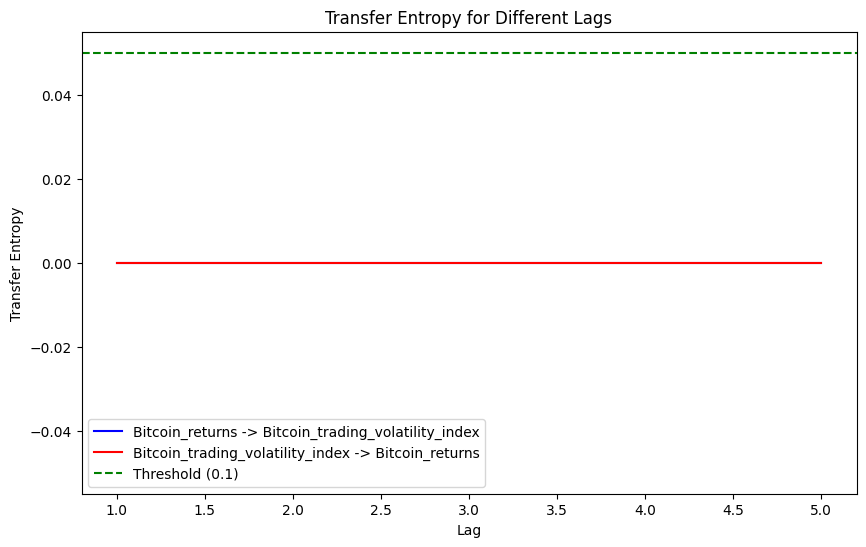

In [ ]:
import pyinform
import numpy as np
import matplotlib.pyplot as plt

lags = range(1,6)  # Lags from 1 to 10
te_x_to_y = []
te_y_to_x = []

for lag in lags:
    te_x_to_y.append(pyinform.transfer_entropy(X, Y, k=lag))
    te_y_to_x.append(pyinform.transfer_entropy(Y, X, k=lag))

# Plot Transfer Entropy for different lags
plt.figure(figsize=(10, 6))
plt.plot(lags, te_x_to_y, label="Bitcoin_returns -> Bitcoin_trading_volatility_index", color='blue')
plt.plot(lags, te_y_to_x, label="Bitcoin_trading_volatility_index -> Bitcoin_returns", color='red')

plt.axhline(0.05, color='green', linestyle='--', label="Threshold (0.1)")

plt.xlabel('Lag')
plt.ylabel('Transfer Entropy')
plt.title('Transfer Entropy for Different Lags')
plt.legend()
plt.show()


In [ ]:
te_x_to_y

[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
import pandas as pd
import pyinform
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_Search_index', 'wiki_search_index', 'price_returns_gold']

# Initialize results storage for transfer entropy
te_results = {}

# Loop through each of the Y columns for Transfer Entropy tests
for y_column in y_columns:
    # Create a dataframe for X and Y series
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    # Transfer entropy test
    te_x_to_y = []
    te_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Calculate Transfer Entropy using pyinform
            te_x_to_y.append(pyinform.transfer_entropy(data['x'], data['y'], k=lag))
            te_y_to_x.append(pyinform.transfer_entropy(data['y'], data['x'], k=lag))

        except Exception as e:
            print(f"Error with Transfer Entropy for lag {lag}: {e}")
            te_x_to_y.append(None)
            te_y_to_x.append(None)

    # Store Transfer Entropy results
    te_results[y_column] = {
        'x_to_y': te_x_to_y,
        'y_to_x': te_y_to_x
    }

    # Plotting Transfer Entropy values
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=te_x_to_y, mode='lines+markers', name=f'{x_column} -> {y_column} (TE)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=te_y_to_x, mode='lines+markers', name=f'{y_column} -> {x_column} (TE)', line=dict(color='red')))

    # Customize layout
    fig.update_layout(
        title=f"Transfer Entropy for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Transfer Entropy",
        template="plotly_white"
    )

    # Show the plot
    fig.show()


Error with Transfer Entropy for lag 1: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 2: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 3: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 4: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 5: an inform error occurred - "negative state in timeseries"


Error with Transfer Entropy for lag 1: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 2: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 3: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 4: an inform error occurred - "negative state in timeseries"
Error with Transfer Entropy for lag 5: an inform error occurred - "negative state in timeseries"


Mutual Information

Overall data

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data['x'].shift(lag)
            data['y_lagged'] = data['y'].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y.append(mutual_info_regression(data_clean[['x_lagged']], data_clean['y'])[0])
            mi_y_to_x.append(mutual_info_regression(data_clean[['y_lagged']], data_clean['x'])[0])

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results
    mi_results[y_column] = {
        'x_to_y': mi_x_to_y,
        'y_to_x': mi_y_to_x
    }

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_x_to_y, mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_y_to_x, mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot

    fig.show()


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data['x'].shift(lag)
            data['y_lagged'] = data['y'].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y.append(mutual_info_regression(data_clean[['x_lagged']], data_clean['y'])[0])
            mi_y_to_x.append(mutual_info_regression(data_clean[['y_lagged']], data_clean['x'])[0])

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results
    mi_results[y_column] = {
        'x_to_y': mi_x_to_y,
        'y_to_x': mi_y_to_x
    }

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_x_to_y, mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_y_to_x, mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')))

    # Add a horizontal threshold line at y = 0.05


    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()



In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)


<ipython-input-14-80a46301699f>:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



   Lag  Bitcoin_returns -> Y Y -> Bitcoin_returns  \
0    1              0.040627                    0   
1    2              0.032366              0.00673   
2    3              0.007538                    0   
3    4              0.000000             0.001394   
4    5              0.000000                    0   
5    1              0.000000                    0   
6    2              0.027978              0.01302   
7    3              0.024888                    0   
8    4              0.007922             0.007086   
9    5              0.009164             0.008709   
10   1              0.000000             0.010087   
11   2              0.014484             0.017617   
12   3              0.016648                    0   
13   4              0.000000                    0   
14   5              0.016659                    0   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_trading_volatility_ind

In [ ]:
results_df.to_csv('overall_multual_information.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Bitcoin_Search', 'views', 'Open', 'Close',
       'Volume', 'Bitcoin_trading_volatility_index', 'Bitcoin_returns',
       'Bitcoin_Search_index', 'wiki_search_index', 'price_returns_gold'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)


   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.017377
1    1  Bitcoin_Search_index -> wiki_search_index            0.016292
2    2  wiki_search_index -> Bitcoin_Search_index            0.001622
3    2  Bitcoin_Search_index -> wiki_search_index            0.009584
4    3  wiki_search_index -> Bitcoin_Search_index            0.006017
5    3  Bitcoin_Search_index -> wiki_search_index            0.018663
6    4  wiki_search_index -> Bitcoin_Search_index            0.000000
7    4  Bitcoin_Search_index -> wiki_search_index            0.000000
8    5  wiki_search_index -> Bitcoin_Search_index            0.000000
9    5  Bitcoin_Search_index -> wiki_search_index            0.016634


In [ ]:
results_df.to_csv('overall_mutual_info_wiki_trends.csv',index=False)

covid first wave
start_date = '2020-03-01'
end_date = '2020-06-15'

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin_gold.csv')

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')]

# Check the first few rows of the new dataframe
print(new_df.head())
df=new_df.copy()

           Date  Bitcoin_Search  views         Open        Close       Volume  \
1704 2020-03-01       54.267377   6902  8599.758789  8562.454102  35349164300   
1705 2020-03-02       58.683206   6572  8563.264648  8869.669922  42857674409   
1706 2020-03-03       58.683206   7543  8865.387695  8787.786133  42386715821   
1707 2020-03-04      140.926697   7554  8788.541992  8755.246094  34746706368   
1708 2020-03-05      136.510868   7666  8760.285156  9078.762695  39698054597   

      Bitcoin_trading_volatility_index  Bitcoin_returns  Bitcoin_Search_index  \
1704                         -0.012461        -0.004318              0.098891   
1705                          0.192610         0.035251              0.078230   
1706                         -0.011050        -0.009275              0.000000   
1707                         -0.198750        -0.003710              0.876086   
1708                          0.133217         0.036285             -0.031836   

      wiki_search_index  


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)


<ipython-input-84-f73929b66848>:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



   Lag  Bitcoin_returns -> Y Y -> Bitcoin_returns  \
0    1              0.052442                    0   
1    2              0.057644                    0   
2    3              0.125162              0.05122   
3    4              0.000000             0.008738   
4    5              0.153241             0.015176   
5    1              0.000000                    0   
6    2              0.000000                    0   
7    3              0.121134             0.066571   
8    4              0.000000             0.001578   
9    5              0.000000                    0   
10   1              0.000000                    0   
11   2              0.018091              0.03761   
12   3              0.000000                    0   
13   4              0.000000             0.013004   
14   5              0.000000             0.076493   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_trading_volatility_ind

In [ ]:
results_df.to_csv('mu_info_covid_first_wave.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)

   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.030910
1    1  Bitcoin_Search_index -> wiki_search_index            0.063456
2    2  wiki_search_index -> Bitcoin_Search_index            0.000000
3    2  Bitcoin_Search_index -> wiki_search_index            0.006090
4    3  wiki_search_index -> Bitcoin_Search_index            0.004679
5    3  Bitcoin_Search_index -> wiki_search_index            0.064251
6    4  wiki_search_index -> Bitcoin_Search_index            0.000000
7    4  Bitcoin_Search_index -> wiki_search_index            0.000000
8    5  wiki_search_index -> Bitcoin_Search_index            0.066407
9    5  Bitcoin_Search_index -> wiki_search_index            0.067955


In [ ]:
results_df.to_csv('mu_info_covid_first_wave_wiki_trends.csv',index=False)

recovery period after covid 20 july to oct 2020


In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

start_date = '2020-07-01'
end_date = '2020-10-31'
# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= '2020-07-01') & (df['Date'] <= '2020-10-31')]

# Check the first few rows of the new dataframe
print(new_df.head())
df=new_df.copy()

           Date  Bitcoin_Search  views         Open        Close       Volume  \
1826 2020-07-01       67.393938   6932  9145.985352  9228.325195  15971550355   
1827 2020-07-02       70.763634   5969  9231.139648  9123.410156  16338916796   
1828 2020-07-03       65.709089   5866  9124.842773  9087.303711  13078970999   
1829 2020-07-04       74.133331   5377  9084.233398  9132.488281  12290528515   
1830 2020-07-05       69.078786   5292  9126.090820  9073.942383  12903406143   

      Bitcoin_trading_volatility_index  Bitcoin_returns  Bitcoin_Search_index  \
1826                          0.014871         0.009837             -0.024693   
1827                          0.022741        -0.011434              0.048790   
1828                         -0.222544        -0.003965             -0.074108   
1829                         -0.062177         0.004960              0.120628   
1830                          0.048662        -0.006431             -0.070618   

      wiki_search_index  


In [ ]:
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
1826,2020-07-01,67.393938,6932,9145.985352,9228.325195,15971550355,0.014871,0.009837,-0.024693,0.095440
1827,2020-07-02,70.763634,5969,9231.139648,9123.410156,16338916796,0.022741,-0.011434,0.048790,-0.149569
1828,2020-07-03,65.709089,5866,9124.842773,9087.303711,13078970999,-0.222544,-0.003965,-0.074108,-0.017406
1829,2020-07-04,74.133331,5377,9084.233398,9132.488281,12290528515,-0.062177,0.004960,0.120628,-0.087042
1830,2020-07-05,69.078786,5292,9126.090820,9073.942383,12903406143,0.048662,-0.006431,-0.070618,-0.015934
...,...,...,...,...,...,...,...,...,...,...
1944,2020-10-27,75.694898,8752,13075.242188,13654.218750,33749878156,0.135894,0.043328,0.057158,-0.091856
1945,2020-10-28,88.310714,8566,13654.214844,13271.285156,35867318895,0.060850,-0.028446,0.154151,-0.021481
1946,2020-10-29,71.489626,7285,13271.298828,13437.882812,56499499598,0.454405,0.012475,-0.211309,-0.161983
1947,2020-10-30,71.489626,10028,13437.874023,13546.522461,30581485201,-0.613837,0.008052,0.000000,0.319564


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

   Lag Bitcoin_returns -> Y Y -> Bitcoin_returns  \
0    1                    0                    0   
1    2             0.102047                    0   
2    3             0.014031             0.082456   
3    4                    0                    0   
4    5                    0                    0   
5    1                    0                    0   
6    2             0.097162                    0   
7    3             0.067121                    0   
8    4             0.030024             0.094894   
9    5             0.003689                    0   
10   1             0.073282             0.015117   
11   2             0.043501             0.066932   
12   3                    0                    0   
13   4                    0                    0   
14   5                    0             0.028438   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_trading_volatility_index  
3   Bitcoin

In [ ]:
results_df.to_csv('mutual_info_recovery.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)

   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.000000
1    1  Bitcoin_Search_index -> wiki_search_index            0.000165
2    2  wiki_search_index -> Bitcoin_Search_index            0.000000
3    2  Bitcoin_Search_index -> wiki_search_index            0.000000
4    3  wiki_search_index -> Bitcoin_Search_index            0.000000
5    3  Bitcoin_Search_index -> wiki_search_index            0.000000
6    4  wiki_search_index -> Bitcoin_Search_index            0.000000
7    4  Bitcoin_Search_index -> wiki_search_index            0.011550
8    5  wiki_search_index -> Bitcoin_Search_index            0.000000
9    5  Bitcoin_Search_index -> wiki_search_index            0.000000


In [ ]:
results_df.to_csv('mutual_info_trends_wiki_recovery.csv')

January to March 2021: Optimism Amid Vaccination Rollouts


In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
start_date = '2021-01-01'
end_date = '2021-03-31'
# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Check the first few rows of the new dataframe
print(new_df.head())
df=new_df.copy()

           Date  Bitcoin_Search  views          Open         Close  \
2010 2021-01-01      185.031973  14769  28994.009766  29374.152344   
2011 2021-01-02      252.316327  31342  29376.455078  32127.267578   
2012 2021-01-03      378.474491  45570  32129.408203  32782.023438   
2013 2021-01-04      328.011225  35715  32810.949219  31971.914062   
2014 2021-01-05      243.905783  31211  31977.041016  33992.429688   

           Volume  Bitcoin_trading_volatility_index  Bitcoin_returns  \
2010  40730301359                         -0.137948         0.012760   
2011  67865420765                          0.510554         0.089590   
2012  78665235202                          0.147675         0.020175   
2013  81163475344                          0.031264        -0.025022   
2014  67547324782                         -0.183637         0.061280   

      Bitcoin_Search_index  wiki_search_index  
2010              0.046520          -0.157656  
2011              0.310155           0.752429  
20

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index','Bitcoin_Search_index', 'wiki_search_index', 'price_returns_gold']

# Initialize results storage
mi_results = {}

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data['x'].shift(lag)
            data['y_lagged'] = data['y'].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y.append(mutual_info_regression(data_clean[['x_lagged']], data_clean['y'])[0])
            mi_y_to_x.append(mutual_info_regression(data_clean[['y_lagged']], data_clean['x'])[0])

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results
    mi_results[y_column] = {
        'x_to_y': mi_x_to_y,
        'y_to_x': mi_y_to_x
    }

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_x_to_y, mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_y_to_x, mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot

    fig.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

<ipython-input-100-80a46301699f>:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



   Lag  Bitcoin_returns -> Y  Y -> Bitcoin_returns  \
0    1              0.059552              0.013924   
1    2              0.000000              0.033392   
2    3              0.000000              0.025494   
3    4              0.000000              0.000000   
4    5              0.000000              0.000000   
5    1              0.000000              0.000000   
6    2              0.000000              0.000000   
7    3              0.024885              0.000000   
8    4              0.000000              0.000000   
9    5              0.053413              0.017100   
10   1              0.046534              0.000000   
11   2              0.086090              0.094715   
12   3              0.000000              0.091879   
13   4              0.000000              0.046319   
14   5              0.066595              0.000000   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_tradin

In [ ]:
results_df.to_csv('mutual_info_vaccination.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
mi_results = {}

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data['x'].shift(lag)
            data['y_lagged'] = data['y'].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y.append(mutual_info_regression(data_clean[['x_lagged']], data_clean['y'])[0])
            mi_y_to_x.append(mutual_info_regression(data_clean[['y_lagged']], data_clean['x'])[0])

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results
    mi_results[y_column] = {
        'x_to_y': mi_x_to_y,
        'y_to_x': mi_y_to_x
    }

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_x_to_y, mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=list(range(1, max_lag + 1)), y=mi_y_to_x, mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot

    fig.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)

   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.000000
1    1  Bitcoin_Search_index -> wiki_search_index            0.000000
2    2  wiki_search_index -> Bitcoin_Search_index            0.079371
3    2  Bitcoin_Search_index -> wiki_search_index            0.011673
4    3  wiki_search_index -> Bitcoin_Search_index            0.000000
5    3  Bitcoin_Search_index -> wiki_search_index            0.042730
6    4  wiki_search_index -> Bitcoin_Search_index            0.000000
7    4  Bitcoin_Search_index -> wiki_search_index            0.178429
8    5  wiki_search_index -> Bitcoin_Search_index            0.000000
9    5  Bitcoin_Search_index -> wiki_search_index            0.084586


In [ ]:
results_df.to_csv('mutual_info_trends_wiki_vacci.csv',index=False)


April to June 2021: Second Wave and the Delta Variant
start_date = '2021-04-01'
end_date = '2021-06-30'

In [ ]:

start_date = '2021-04-01'
end_date = '2021-06-30'

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and 'Date' is the date column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Create a new DataFrame with rows between March 2020 and June 2020
new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Check the first few rows of the new dataframe
print(new_df.head())
df=new_df.copy()

           Date  Bitcoin_Search  views          Open         Close  \
2100 2021-04-01      184.401182  25512  58926.562500  59095.808594   
2101 2021-04-02      174.098266  18312  59098.878906  59384.312500   
2102 2021-04-03      164.426140  16802  59397.410156  57603.890625   
2103 2021-04-04      164.426140  15150  57604.839844  58758.554688   
2104 2021-04-05      174.098266  17115  58760.875000  59057.878906   

           Volume  Bitcoin_trading_volatility_index  Bitcoin_returns  \
2100  61669163792                         -0.060584         0.002999   
2101  58727860620                         -0.048870         0.004870   
2102  59641344484                          0.015435        -0.030440   
2103  50749662970                         -0.161444         0.019847   
2104  60706272115                          0.179142         0.005081   

      Bitcoin_Search_index  wiki_search_index  
2100              0.103209           0.310679  
2101             -0.057494          -0.331592  
21

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

<ipython-input-107-80a46301699f>:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



   Lag Bitcoin_returns -> Y  Y -> Bitcoin_returns  \
0    1                    0              0.017285   
1    2             0.033111              0.000000   
2    3             0.083976              0.068696   
3    4             0.031478              0.000000   
4    5                    0              0.000000   
5    1             0.141708              0.122537   
6    2                    0              0.076071   
7    3             0.066384              0.000000   
8    4             0.102092              0.000000   
9    5                    0              0.000000   
10   1                    0              0.053190   
11   2             0.004451              0.000000   
12   3             0.115309              0.120653   
13   4             0.075005              0.000000   
14   5                    0              0.092282   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_trading_volatility_ind

In [ ]:
results_df.to_csv('mutual_info_covid_2.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)

   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.131614
1    1  Bitcoin_Search_index -> wiki_search_index            0.000000
2    2  wiki_search_index -> Bitcoin_Search_index            0.022660
3    2  Bitcoin_Search_index -> wiki_search_index            0.000000
4    3  wiki_search_index -> Bitcoin_Search_index            0.000000
5    3  Bitcoin_Search_index -> wiki_search_index            0.011085
6    4  wiki_search_index -> Bitcoin_Search_index            0.000000
7    4  Bitcoin_Search_index -> wiki_search_index            0.000000
8    5  wiki_search_index -> Bitcoin_Search_index            0.000000
9    5  Bitcoin_Search_index -> wiki_search_index            0.000000


In [ ]:
results_df.to_csv('mutual_info_wiki_trends_second_covid.csv',index=False)

REcovery Period after covid 2021

In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
start_date = '2021-07-01'
end_date = '2021-09-30'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]



In [ ]:
df=filtered_df.copy()
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
2191,2021-07-01,203.114643,17427,35035.984375,33572.117188,37838957079,0.105244,-0.042818,0.048790,0.220035
2192,2021-07-02,183.770392,14570,33549.601562,33897.046875,38728974942,0.023249,0.009632,-0.100083,-0.179056
2193,2021-07-03,174.098266,12428,33854.421875,34668.546875,24383958643,-0.462663,0.022505,-0.054067,-0.159013
2194,2021-07-04,174.098266,12984,34665.566406,35287.781250,24924307911,0.021918,0.017704,0.000000,0.043766
2195,2021-07-05,154.754014,12792,35284.343750,33746.003906,26721554282,0.069627,-0.044675,-0.117783,-0.014898
...,...,...,...,...,...,...,...,...,...,...
2278,2021-09-26,134.562488,43800,42721.628906,43208.539062,30661222077,-0.030308,0.011451,-0.068993,0.032603
2279,2021-09-27,124.950882,38900,43234.183594,42235.730469,30980029059,0.010344,-0.022772,-0.074108,-0.118640
2280,2021-09-28,117.727047,44167,42200.898438,41034.542969,30214940550,-0.025006,-0.028852,-0.059552,0.126984
2281,2021-09-29,115.339276,25438,41064.984375,41564.363281,30602359905,0.012741,0.012829,-0.020491,-0.551734


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'Bitcoin_returns'
y_columns = ['Bitcoin_trading_volatility_index', 'Bitcoin_Search_index', 'wiki_search_index']

# Initialize results storage
mi_results = {}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Lag', f'{x_column} -> Y', f'Y -> {x_column}', 'Y_Column'])

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data[f'{x_column}_lagged'] = data[x_column].shift(lag)
            data[f'{y_column}_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            x_to_y = mutual_info_regression(data_clean[[f'{x_column}_lagged']], data_clean[y_column])[0]
            y_to_x = mutual_info_regression(data_clean[[f'{y_column}_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(x_to_y)
            mi_y_to_x.append(y_to_x)

            # Append the results to the DataFrame
            results_df = pd.concat(
                [results_df, pd.DataFrame({'Lag': [lag],
                                           f'{x_column} -> Y': [x_to_y],
                                           f'Y -> {x_column}': [y_to_x],
                                           'Y_Column': [y_column]})]
            )

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Store Mutual Information results for the current `y_column`
    mi_results[y_column] = {
        f'{x_column} -> {y_column}': mi_x_to_y,
        f'{y_column} -> {x_column}': mi_y_to_x
    }

    # Plotting Mutual Information values for this Y column
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_x_to_y,
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)),
        y=mi_y_to_x,
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white",

    )

    # Show the plot
    fig.show()

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

   Lag Bitcoin_returns -> Y Y -> Bitcoin_returns  \
0    1                    0                    0   
1    2             0.014746             0.156582   
2    3                    0                    0   
3    4             0.068469                    0   
4    5             0.152031                    0   
5    1             0.021884              0.05963   
6    2                    0              0.09118   
7    3                    0             0.141525   
8    4              0.00614             0.011102   
9    5                    0                    0   
10   1                    0             0.067826   
11   2                    0             0.034639   
12   3             0.075765                    0   
13   4                    0                    0   
14   5             0.120046             0.064714   

                            Y_Column  
0   Bitcoin_trading_volatility_index  
1   Bitcoin_trading_volatility_index  
2   Bitcoin_trading_volatility_index  
3   Bitcoin

In [ ]:
results_df.to_csv('mutual_info_after_covid_2021.csv',index=False)


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# Set parameters
max_lag = 5  # Maximum number of lags
x_column = 'wiki_search_index'
y_columns = ['Bitcoin_Search_index']

# Initialize results storage
all_results = []

# Loop through each of the Y columns for mutual information tests
for y_column in y_columns:
    # Create a dataframe for X and Y series with lags
    data = pd.DataFrame({x_column: df[x_column], y_column: df[y_column]})

    # Initialize lists to store Mutual Information values for each lag
    mi_x_to_y = []
    mi_y_to_x = []

    for lag in range(1, max_lag + 1):
        try:
            # Shift the series to create lagged data
            data['x_lagged'] = data[x_column].shift(lag)
            data['y_lagged'] = data[y_column].shift(lag)

            # Remove NaN values resulting from the lag
            data_clean = data.dropna()

            # Calculate Mutual Information for X -> Y and Y -> X
            mi_x_to_y_value = mutual_info_regression(data_clean[['x_lagged']], data_clean[y_column])[0]
            mi_y_to_x_value = mutual_info_regression(data_clean[['y_lagged']], data_clean[x_column])[0]

            mi_x_to_y.append(mi_x_to_y_value)
            mi_y_to_x.append(mi_y_to_x_value)

            # Store results for DataFrame
            all_results.append({
                'Lag': lag,
                'Direction': f'{x_column} -> {y_column}',
                'Mutual Information': mi_x_to_y_value
            })
            all_results.append({
                'Lag': lag,
                'Direction': f'{y_column} -> {x_column}',
                'Mutual Information': mi_y_to_x_value
            })

        except Exception as e:
            print(f"Error with Mutual Information for lag {lag}: {e}")
            mi_x_to_y.append(None)
            mi_y_to_x.append(None)

    # Plotting Mutual Information values
    fig = go.Figure()

    # Add traces for Mutual Information (X -> Y and Y -> X)
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_x_to_y,
        mode='lines+markers', name=f'{x_column} -> {y_column} (MI)', line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(1, max_lag + 1)), y=mi_y_to_x,
        mode='lines+markers', name=f'{y_column} -> {x_column} (MI)', line=dict(color='red')
    ))

    # Customize layout
    fig.update_layout(
        title=f"Mutual Information for {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="Mutual Information",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Create a DataFrame for all results
results_df = pd.DataFrame(all_results)
print(results_df)

   Lag                                  Direction  Mutual Information
0    1  wiki_search_index -> Bitcoin_Search_index            0.141984
1    1  Bitcoin_Search_index -> wiki_search_index            0.112227
2    2  wiki_search_index -> Bitcoin_Search_index            0.030385
3    2  Bitcoin_Search_index -> wiki_search_index            0.063054
4    3  wiki_search_index -> Bitcoin_Search_index            0.000000
5    3  Bitcoin_Search_index -> wiki_search_index            0.000000
6    4  wiki_search_index -> Bitcoin_Search_index            0.064366
7    4  Bitcoin_Search_index -> wiki_search_index            0.032830
8    5  wiki_search_index -> Bitcoin_Search_index            0.000000
9    5  Bitcoin_Search_index -> wiki_search_index            0.071933


In [ ]:
results_df.to_csv('mutual_info_covid2021recovery_trends.csv',index=False)

S&P 500 index

In [ ]:
import requests
import pandas as pd

def get_wikipedia_pageviews(page_title, start_date, end_date):
    # Base URL for Wikimedia Pageviews API
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{page_title}/daily/{start_date}/{end_date}"

    # Adding a User-Agent for API request
    headers = {
        "User-Agent": "StockAnalysisTool/1.0 (your.email@example.com)"
    }

    # Making the GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()['items']
        df = pd.DataFrame(data)
        df['date'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
        df = df[['date', 'views']]
        return df
    else:
        print(f"Error fetching data for {page_title}: {response.status_code}")
        return pd.DataFrame()

# Fetching pageviews for S&P 500
page_title = "S%26P_500"  # Wikipedia title for S&P 500
start_date = "20150101"  # Format: YYYYMMDD
end_date = "20241231"    # Format: YYYYMMDD

# Get the pageviews data
sp500_pageviews = get_wikipedia_pageviews(page_title, start_date, end_date)

# Display the data
print(sp500_pageviews)


           date  views
0    2015-07-01   2664
1    2015-07-02   2524
2    2015-07-03   1954
3    2015-07-04   1333
4    2015-07-05   1420
...         ...    ...
3467 2024-12-27   4888
3468 2024-12-28   3959
3469 2024-12-29   4629
3470 2024-12-30   4864
3471 2024-12-31   5203

[3472 rows x 2 columns]


In [ ]:
sp500_pageviews

,date,views
0,2015-07-01,2664
1,2015-07-02,2524
2,2015-07-03,1954
3,2015-07-04,1333
4,2015-07-05,1420
...,...,...
3467,2024-12-27,4888
3468,2024-12-28,3959
3469,2024-12-29,4629
3470,2024-12-30,4864


In [ ]:
df=pd.read_csv('/content/s&P 500 daily.csv')
df=df[['date','close','open']]
df

,date,close,open
0,1/4/2010,1132.989990,1116.560059
1,1/5/2010,1136.520020,1132.660034
2,1/6/2010,1137.140015,1135.709961
3,1/7/2010,1141.689941,1136.270020
4,1/8/2010,1144.979980,1140.520020
...,...,...,...
3770,12/26/2024,6037.589844,6024.970215
3771,12/27/2024,5970.839844,6006.169922
3772,12/30/2024,5906.939941,5920.669922
3773,12/31/2024,5881.629883,5919.740234


In [ ]:
df['date']=pd.to_datetime(df['date'])


In [ ]:
import yfinance as yf

# Fetch historical data for S&P 500
sp500 = "^GSPC"  # S&P 500 index ticker on Yahoo Finance
data = yf.download(sp500, start="2010-01-01", end="2023-12-31")

# Display the data
print(data)


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000
...                 ...          ...          ...          ...         ...
2023-12-22  4754.629883  4772.939941  4736.770020  4753.919922  3046770000
2023-12-26  4774.750000  4784.720215  4758.450195  4758.859863  2513910000
2023-12-27  4781.580078  4785.390137  4768.899902  4773.450195  2748450000
2023-12-28  4783.350098  4793.299805  4780.979980  4786.439941  2698860000
2023-12-29  4769.830078  

In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000


In [ ]:
data

In [ ]:
merged_df=pd.merge(df,sp500_pageviews,on='date')
merged_df

,date,close,open,views
0,2015-07-01,2077.419922,2067.000000,2664
1,2015-07-02,2076.780029,2078.030029,2524
2,2015-07-06,2068.760010,2073.949951,2911
3,2015-07-07,2081.340088,2069.520020,3214
4,2015-07-08,2046.680054,2077.659912,3968
...,...,...,...,...
2388,2024-12-26,6037.589844,6024.970215,4440
2389,2024-12-27,5970.839844,6006.169922,4888
2390,2024-12-30,5906.939941,5920.669922,4864
2391,2024-12-31,5881.629883,5919.740234,5203


In [ ]:
merged_df['s&P_returns']=df['close'].pct_change()*100
merged_df.dropna(inplace=True)


In [ ]:
merged_df.rename(columns={'views':'s_p_wiki'},inplace=True)

In [ ]:
merged_df

,date,close,open,s_p_wiki,s&P_returns
1,2015-07-02,2076.780029,2078.030029,2524,0.311568
2,2015-07-06,2068.760010,2073.949951,2911,0.054552
3,2015-07-07,2081.340088,2069.520020,3214,0.400120
4,2015-07-08,2046.680054,2077.659912,3968,0.288173
5,2015-07-09,2051.310059,2049.729980,3290,0.174676
...,...,...,...,...,...
2388,2024-12-26,6037.589844,6024.970215,4440,0.767230
2389,2024-12-27,5970.839844,6006.169922,4888,0.292813
2390,2024-12-30,5906.939941,5920.669922,4864,0.767238
2391,2024-12-31,5881.629883,5919.740234,5203,-0.180590


In [ ]:
import numpy as np

In [ ]:
merged_df['s_p_index']=np.log(merged_df['s_p_wiki']/merged_df['s_p_wiki'].shift(1))
merged_df.dropna(inplace=True)

****Granger casuality

overall data

In [ ]:
df=merged_df.copy()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Covid 20 covid first wave

In [ ]:

start_date = '2020-03-01'
end_date = '2020-06-15'

# Filter the DataFrame
df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



recovery period after covid 20 july to oct 2020


In [ ]:

start_date = '2020-07-01'
end_date = '2020-10-31'

# Filter the DataFrame
df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



January to March 2021: Optimism Amid Vaccination Rollouts



In [ ]:
start_date = '2021-01-01'
end_date = '2021-03-31'

df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



April to June 2021: Second Wave and the Delta Variant


In [ ]:
start_date = '2021-04-01'
end_date = '2021-06-30'

# Filter the DataFrame
df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



July to September 2021: Recovery and Regional Divergence


In [ ]:
start_date = '2021-07-01'
end_date = '2021-09-30'

# Filter the DataFrame
df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests

# Parameters
threshold = 0.05  # P-value threshold for significance
x_column = 's&P_returns'
y_columns = ['s_p_index']
max_lag = 10  # Maximum lag to test

# Iterate through each dependent column
for y_column in y_columns:
    print(f"Performing Granger Causality Test for {x_column} and {y_column}...")
    data = pd.DataFrame({'x': df[x_column], 'y': df[y_column]})

    p_values_x_to_y = []
    p_values_y_to_x = []

    # Perform Granger causality test for all lags up to max_lag
    try:
        result_x_to_y = grangercausalitytests(data[['y', 'x']], max_lag, verbose=False)
        result_y_to_x = grangercausalitytests(data[['x', 'y']], max_lag, verbose=False)

        for lag in range(1, max_lag + 1):
            try:
                # Extract p-value for x -> y
                p_value_x_to_y = result_x_to_y[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_x_to_y.append(p_value_x_to_y)

                # Extract p-value for y -> x
                p_value_y_to_x = result_y_to_x[lag][0]['ssr_chi2test'][1]  # Chi-square test p-value
                p_values_y_to_x.append(p_value_y_to_x)
            except Exception as e:
                print(f"Error extracting p-value for lag {lag}: {e}")
                p_values_x_to_y.append(None)
                p_values_y_to_x.append(None)
    except Exception as e:
        print(f"Error performing Granger causality tests for {y_column}: {e}")
        continue

    # Create a DataFrame to store the results
    p_values_df = pd.DataFrame({
        'Lag': range(1, max_lag + 1),
        'p_values_x_to_y': p_values_x_to_y,
        'p_values_y_to_x': p_values_y_to_x
    })

    # Plot p-values using Plotly
    fig = go.Figure()

    # Add traces for p-values
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_x_to_y'],
        mode='lines+markers',
        name=f'{x_column} -> {y_column}',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=p_values_df['Lag'],
        y=p_values_df['p_values_y_to_x'],
        mode='lines+markers',
        name=f'{y_column} -> {x_column}',
        line=dict(color='red')
    ))

    # Add a significance threshold line
    fig.add_hline(
        y=0.05,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Significance Threshold ({threshold})",
        annotation_position="top left"
    )

    # Customize the layout
    fig.update_layout(
        title=f"Granger Causality Test P-Values Between {x_column} and {y_column}",
        xaxis_title="Lag",
        yaxis_title="P-Value",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

Performing Granger Causality Test for s&P_returns and s_p_index...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



comparative analysis bw bitcoin and s&P 500 through fear and greed index

In [ ]:
import pandas as pd

In [ ]:
fear_greed=pd.read_csv('/content/risk and greed data.csv')
fear_greed

,Date,score
0,01-07-2025,78
1,01-06-2025,76
2,01-05-2025,72
3,01-04-2025,73
4,01-03-2025,74
...,...,...
2524,02-05-2018,11
2525,02-04-2018,24
2526,02-03-2018,40
2527,02-02-2018,15


In [ ]:
fear_greed['Date']=pd.to_datetime(fear_greed['Date'])



In [ ]:
fear_greed=fear_greed.sort_values(by='Date')
fear_greed

,Date,score
2528,2018-02-01,30
2527,2018-02-02,15
2526,2018-02-03,40
2525,2018-02-04,24
2524,2018-02-05,11
...,...,...
4,2025-01-03,74
3,2025-01-04,73
2,2025-01-05,72
1,2025-01-06,76


In [ ]:
df=pd.read_csv('/content/timeseries_data_bitcoin.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index
0,2015-07-02,30.989822,9938,258.552002,255.412003,21551900,-0.226476,-0.012486,0.067841,-0.279067
1,2015-07-03,30.489822,8498,255.459000,256.335999,19033800,-0.124248,0.003611,-0.016266,-0.156535
2,2015-07-04,34.555131,9113,256.490997,260.885986,15620400,-0.197639,0.017594,0.125163,0.069871
3,2015-07-05,34.555131,8908,260.804993,271.912994,44156100,1.039153,0.041399,0.000000,-0.022752
4,2015-07-06,35.055131,10456,271.108002,269.029999,49154800,0.107243,-0.010659,0.014366,0.160226
...,...,...,...,...,...,...,...,...,...,...
3436,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831
3437,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559
3438,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762
3439,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303


In [ ]:
fear_greed['Date']=pd.to_datetime(fear_greed['Date'])


In [ ]:
df=pd.merge(df,fear_greed,on='Date')
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,score
0,2018-02-01,424.919081,50088,10237.299805,9170.540039,9959400448,0.213943,-0.108458,0.575364,0.069181,30
1,2018-02-02,478.033966,55719,9142.280273,8830.750000,12726899712,0.245201,-0.037756,0.117783,0.106540,15
2,2018-02-03,292.131868,47365,8852.120117,9174.910156,7263790080,-0.560816,0.038233,-0.492476,-0.162438,40
3,2018-02-04,278.853147,45525,9175.700195,8277.009766,7073549824,-0.026539,-0.102991,-0.046520,-0.039622,24
4,2018-02-05,371.804196,59427,8270.540039,6955.270020,9285289984,0.272069,-0.173982,0.287682,0.266487,11
...,...,...,...,...,...,...,...,...,...,...,...
2487,2024-11-27,160.129323,11756,91978.140625,95962.531250,71133452438,-0.253490,0.042329,-0.018019,-0.083831,75
2488,2024-11-28,148.483554,10792,95954.945312,95652.468750,52260008261,-0.308326,-0.003236,-0.075508,-0.085559,77
2489,2024-11-29,157.217881,10730,95653.953125,97461.523438,54968682476,0.050532,0.018736,0.057158,-0.005762,78
2490,2024-11-30,133.926343,9619,97468.812500,96449.054688,31634227866,-0.552524,-0.010443,-0.160343,-0.109303,84


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='Bitcoin_returns', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.003023             0.031679
1    2             0.008560             0.043608
2    3             0.024701             0.061627
3    4             0.044277             0.082876


In [ ]:
te_results.to_csv('transfer entropy results.csv')

In [ ]:
u=df.copy()

score and s&P transfer entropy overall

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.004327        0.016338
1    2        0.006916        0.022762
2    3        0.006217        0.039245
3    4        0.009751        0.052974


In [ ]:
te_results.to_csv('transfer entropy results sp.csv',index=False)

covid 2020

In [ ]:
u=df.copy()

In [ ]:
df=u.copy()
start_date = '2020-03-01'
end_date = '2020-06-15'


# Filter the DataFrame
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


In [ ]:
df=filtered_df.copy()
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,score
756,2020-03-01,54.267377,6902,8599.758789,8562.454102,35349164300,-0.012461,-0.004318,0.098891,0.255089,39
757,2020-03-02,58.683206,6572,8563.264648,8869.669922,42857674409,0.192610,0.035251,0.078230,-0.048993,38
758,2020-03-03,58.683206,7543,8865.387695,8787.786133,42386715821,-0.011050,-0.009275,0.000000,0.137802,38
759,2020-03-04,140.926697,7554,8788.541992,8755.246094,34746706368,-0.198750,-0.003710,0.876086,0.001457,40
760,2020-03-05,136.510868,7666,8760.285156,9078.762695,39698054597,0.133217,0.036285,-0.031836,0.014718,41
...,...,...,...,...,...,...,...,...,...,...,...
858,2020-06-11,79.187877,6831,9870.078125,9321.781250,30247143440,0.162655,-0.057156,-0.227390,-0.025867,52
859,2020-06-12,74.133331,6579,9320.690430,9480.843750,22610564515,-0.290984,0.016920,-0.065958,-0.037588,38
860,2020-06-13,75.818180,5793,9480.735352,9475.277344,17564322315,-0.252548,-0.000587,0.022473,-0.127232,38
861,2020-06-14,64.024241,5857,9477.553711,9386.788086,18991732746,0.078134,-0.009383,-0.169076,0.010987,40


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='bit_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.088576             0.043087
1    2             0.124893             0.061246
2    3             0.122096             0.020480
3    4             0.162407             0.037128


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='Bitcoin_returns', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.015547             0.037803
1    2             0.046716             0.113635
2    3             0.096346             0.121033
3    4             0.141704             0.132443


In [ ]:
te_results.to_csv('transfer covid20.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.099133        0.047328
1    2        0.150490        0.144943
2    3        0.173598        0.118998
3    4        0.260299        0.107569


recovery period after covid 20 july to oct 2020
start_date = '2020-07-01'
end_date = '2020-10-31'


In [ ]:
df=u.copy()

In [ ]:

start_date = '2020-07-01'
end_date = '2020-10-31'

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [ ]:
df=filtered_df.copy()
df

,Date,Bitcoin_Search,views,Open,Close,Volume,Bitcoin_trading_volatility_index,Bitcoin_returns,Bitcoin_Search_index,wiki_search_index,score
878,2020-07-01,67.393938,6932,9145.985352,9228.325195,15971550355,0.014871,0.009837,-0.024693,0.095440,42
879,2020-07-02,70.763634,5969,9231.139648,9123.410156,16338916796,0.022741,-0.011434,0.048790,-0.149569,42
880,2020-07-03,65.709089,5866,9124.842773,9087.303711,13078970999,-0.222544,-0.003965,-0.074108,-0.017406,41
881,2020-07-04,74.133331,5377,9084.233398,9132.488281,12290528515,-0.062177,0.004960,0.120628,-0.087042,40
882,2020-07-05,69.078786,5292,9126.090820,9073.942383,12903406143,0.048662,-0.006431,-0.070618,-0.015934,38
...,...,...,...,...,...,...,...,...,...,...,...
996,2020-10-27,75.694898,8752,13075.242188,13654.218750,33749878156,0.135894,0.043328,0.057158,-0.091856,61
997,2020-10-28,88.310714,8566,13654.214844,13271.285156,35867318895,0.060850,-0.028446,0.154151,-0.021481,70
998,2020-10-29,71.489626,7285,13271.298828,13437.882812,56499499598,0.454405,0.012475,-0.211309,-0.161983,67
999,2020-10-30,71.489626,10028,13437.874023,13546.522461,30581485201,-0.613837,0.008052,0.000000,0.319564,74


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='Bitcoin_returns', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.047530             0.096095
1    2             0.085765             0.111042
2    3             0.108324             0.114471
3    4             0.138110             0.100641


In [ ]:
te_results.to_csv('transfer recovery.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.070277        0.147976
1    2        0.131382        0.264355
2    3        0.253549        0.242453
3    4        0.235893        0.219170


January to March 2021: Optimism Amid Vaccination Rollouts
start_date = '2021-01-01'
end_date = '2021-03-31'


In [ ]:
df=u.copy()

In [ ]:

start_date = '2021-01-01'
end_date = '2021-03-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df=filtered_df.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='Bitcoin_returns', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.063461             0.150334
1    2             0.195811             0.179525
2    3             0.252851             0.202665
3    4             0.287817             0.241240


In [ ]:
te_results.to_csv('transfer vacc.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.118285        0.125613
1    2        0.256939        0.278438
2    3        0.287429        0.238429
3    4        0.166847        0.276397



April to June 2021: Second Wave and the Delta Variant
start_date = '2021-04-01'
end_date = '2021-06-30'


In [ ]:
df=u.copy()

In [ ]:

start_date = '2021-04-01'
end_date = '2021-06-30'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df=filtered_df.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='Bitcoin_returns', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.115976             0.146708
1    2             0.211022             0.211409
2    3             0.306729             0.213822
3    4             0.363329             0.205653


In [ ]:
te_results.to_csv('transfer delta.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.084740        0.136024
1    2        0.312877        0.282800
2    3        0.307020        0.163818
3    4        0.300811        0.133059



July to September 2021: Recovery and Regional Divergence
start_date = '2021-07-01'
end_date = '2021-09-30'


In [ ]:



start_date = '2021-07-01'
end_date = '2021-09-30'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

In [ ]:
df=filtered_df.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='bit_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_btc = []  # Score to Bitcoin
    te_btc_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_btc.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_btc_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_Bitcoin': te_score_to_btc,
        'TE_Bitcoin_to_Score': te_btc_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_Bitcoin  TE_Bitcoin_to_Score
0    1             0.075265             0.118980
1    2             0.131045             0.280936
2    3             0.175980             0.294614
3    4             0.216594             0.289037


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy
from collections import Counter

def compute_transfer_entropy(x, y, lags_x=1, lags_y=1, bins=3):
    """
    Computes Transfer Entropy (TE) from time series y to x using discretization.

    Parameters:
    -----------
    x : np.array or list
        Target time series
    y : np.array or list
        Source time series
    lags_x : int, default=1
        Number of past values of x to consider
    lags_y : int, default=1
        Number of past values of y to consider
    bins : int, default=3
        Number of bins for discretization
    """
    # Convert inputs to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)

    if x.shape != y.shape:
        raise ValueError("Time series x and y must have the same shape")

    # Discretize the time series
    discretizer_x = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    discretizer_y = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')

    x_discrete = discretizer_x.fit_transform(x.reshape(-1, 1)).flatten()
    y_discrete = discretizer_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create state vectors
    def create_state_vector(data, lags, current_idx):
        return tuple(data[current_idx - lags:current_idx])

    # Initialize lists to store states
    x_states = []
    y_states = []
    x_next = []

    # Build state vectors
    for i in range(max(lags_x, lags_y), len(x_discrete)):
        x_states.append(create_state_vector(x_discrete, lags_x, i))
        y_states.append(create_state_vector(y_discrete, lags_y, i))
        x_next.append(x_discrete[i])

    # Calculate joint and marginal probabilities
    def get_probabilities(*args):
        joint_states = list(zip(*args))
        counts = Counter(joint_states)
        total = len(joint_states)
        return {state: count/total for state, count in counts.items()}

    # Calculate conditional entropy
    def conditional_entropy(joint_probs, marginal_probs):
        cond_ent = 0
        for joint_state, joint_prob in joint_probs.items():
            marginal_state = joint_state[:-1]
            if marginal_state in marginal_probs and marginal_probs[marginal_state] > 0:
                cond_ent -= joint_prob * np.log2(joint_prob / marginal_probs[marginal_state])
        return cond_ent

    # Calculate probabilities
    p_x_past_future = get_probabilities(x_states, x_next)
    p_x_past = get_probabilities(x_states)
    p_xy_past_future = get_probabilities(x_states, y_states, x_next)
    p_xy_past = get_probabilities(x_states, y_states)

    # Calculate transfer entropy as difference of conditional entropies
    h_x_given_x_past = conditional_entropy(p_x_past_future, p_x_past)
    h_x_given_xy_past = conditional_entropy(p_xy_past_future, p_xy_past)

    transfer_entropy = h_x_given_x_past - h_x_given_xy_past

    return max(0, transfer_entropy)  # Transfer entropy should be non-negative

# Compute transfer entropy for different lags
def compute_te_for_lags(df, col1='s_P_wiki', col2='score', max_lag=4, bins=3):
    """
    Compute transfer entropy for different lags between two time series.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the time series
    col1, col2 : str
        Column names for the time series
    max_lag : int
        Maximum lag to consider
    bins : int
        Number of bins for discretization
    """
    # Create empty lists to store results
    lags = range(1, max_lag + 1)
    te_score_to_sp = []  # Score to Bitcoin
    te_sp_to_score = []  # Bitcoin to Score

    # Compute transfer entropy for each lag
    for lag in lags:
        # Forward direction (Score to Bitcoin)
        te_forward = compute_transfer_entropy(
            df[col1].values,
            df[col2].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_score_to_sp.append(te_forward)

        # Backward direction (Bitcoin to Score)
        te_backward = compute_transfer_entropy(
            df[col2].values,
            df[col1].values,
            lags_x=lag,
            lags_y=lag,
            bins=bins
        )
        te_sp_to_score.append(te_backward)

    # Create DataFrame with results
    te_df = pd.DataFrame({
        'Lag': lags,
        'TE_Score_to_SP': te_score_to_sp,
        'TE_SP_to_Score': te_sp_to_score
    })

    return te_df

# Run the analysis
te_results = compute_te_for_lags(df, max_lag=4, bins=3)
print("\nTransfer Entropy Results:")
print(te_results)


Transfer Entropy Results:
   Lag  TE_Score_to_SP  TE_SP_to_Score
0    1        0.164250        0.095877
1    2        0.216618        0.161229
2    3        0.399184        0.252494
3    4        0.394693        0.252326
